In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot(val, name, x_label, y_label, file):
    plt.figure(figsize=(16, 9))
    plt.plot(val)
    plt.title(name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f"{file}.png")
    plt.show()

In [3]:
psi = np.fromfile('wf.dat', dtype=np.cdouble)
print(psi)

NX, NY, NZ = 128, 128, 128
dx, dy, dz = 1, 1, 1

Psi_x, Psi_y, Psi_z = [], [], []

Psi_norm_x, Psi_norm_y, Psi_norm_z, Psi_pow_x, Psi_pow_y, Psi_pow_z = [], [], [], [], [], []

for ix in range(NX):
    Psi_x.append(psi[int( (NZ/2)*dz + NZ*(NY/2)*dy + NZ*NY*ix )])
    Psi_y.append(psi[int( (NZ/2)*dz + NZ*ix + NZ*NY*(NX/2)*dx )])
    Psi_z.append(psi[int( ix + NZ*(NY/2)*dy + NZ*NY*(NX/2)*dx )])

    Psi_norm_x.append(np.sqrt(np.power(np.real(Psi_x[ix]), 2) + np.power(np.imag(Psi_x[ix]), 2)))
    Psi_norm_y.append(np.sqrt(np.power(np.real(Psi_y[ix]), 2) + np.power(np.imag(Psi_y[ix]), 2)))
    Psi_norm_z.append(np.sqrt(np.power(np.real(Psi_z[ix]), 2) + np.power(np.imag(Psi_z[ix]), 2)))

    Psi_pow_x.append(np.power(np.real(Psi_x[ix]), 2) + np.power(np.imag(Psi_x[ix]), 2))
    Psi_pow_y.append(np.power(np.real(Psi_y[ix]), 2) + np.power(np.imag(Psi_y[ix]), 2))
    Psi_pow_z.append(np.power(np.real(Psi_z[ix]), 2) + np.power(np.imag(Psi_z[ix]), 2))

[1.57079298e-14-9.30705132e-14j 1.57079298e-14-9.30705132e-14j
 1.57079298e-14-9.30705132e-14j ... 3.66052774e-14-2.18573160e-13j
 3.66052774e-14-2.18573160e-13j 3.66052774e-14-2.18573160e-13j]


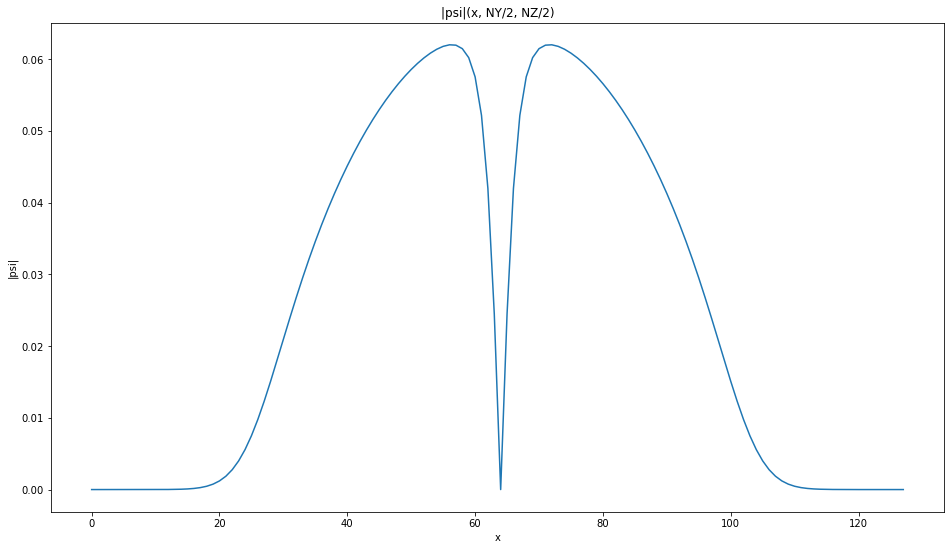

In [4]:
plot(Psi_norm_x, "|psi|(x, NY/2, NZ/2)", "x", "|psi|", "psi_x")

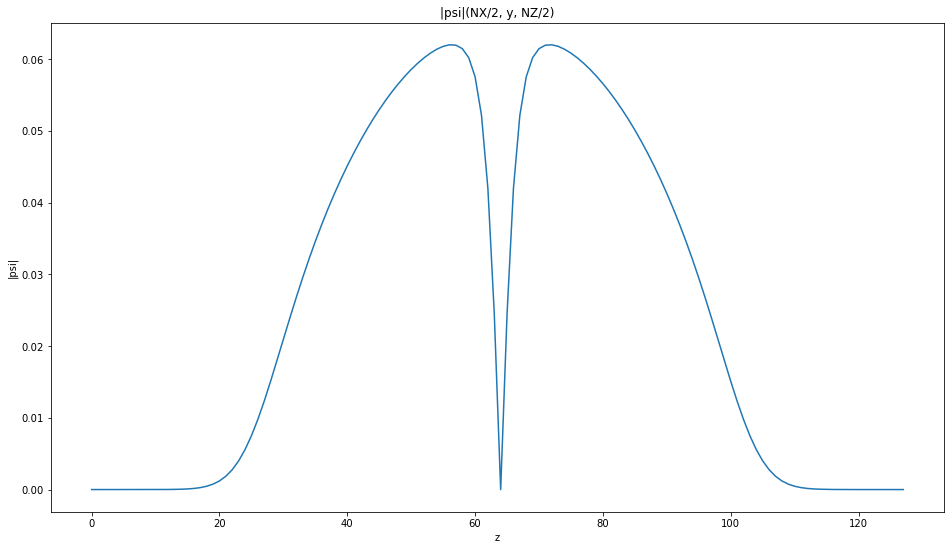

In [5]:
plot(Psi_norm_y, "|psi|(NX/2, y, NZ/2)", "z", "|psi|", "psi_y")

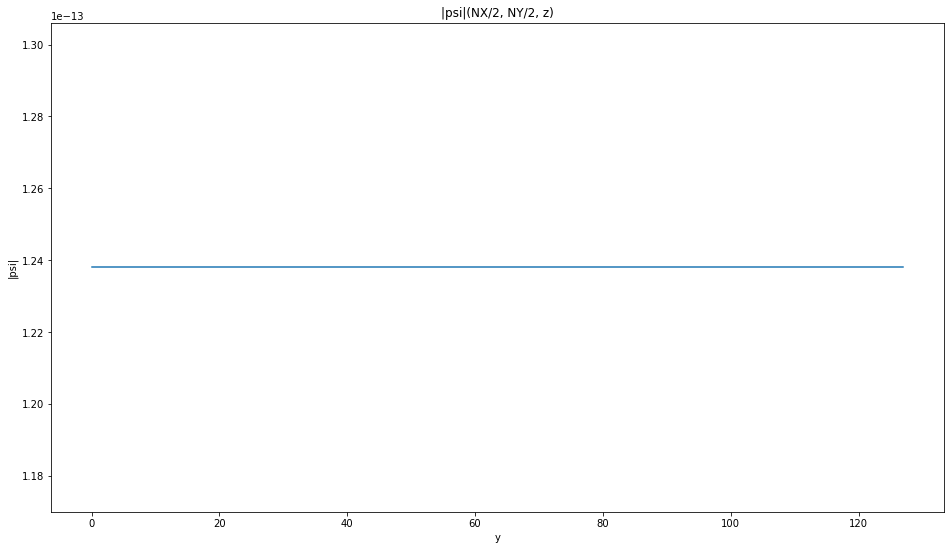

In [6]:
plot(Psi_norm_z, "|psi|(NX/2, NY/2, z)", "y", "|psi|",  "psi_z")

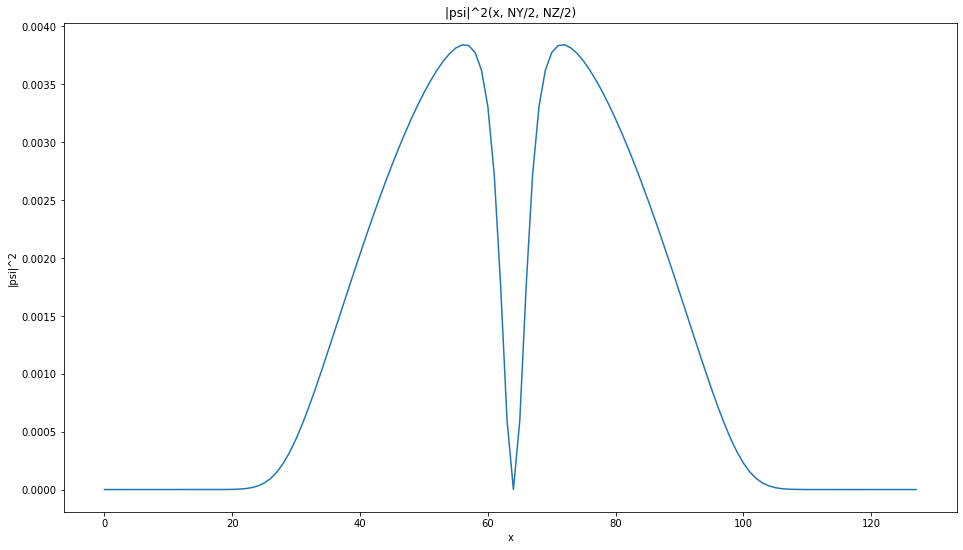

In [7]:
plot(Psi_pow_x, "|psi|^2(x, NY/2, NZ/2)", "x", "|psi|^2", "psi2_x")

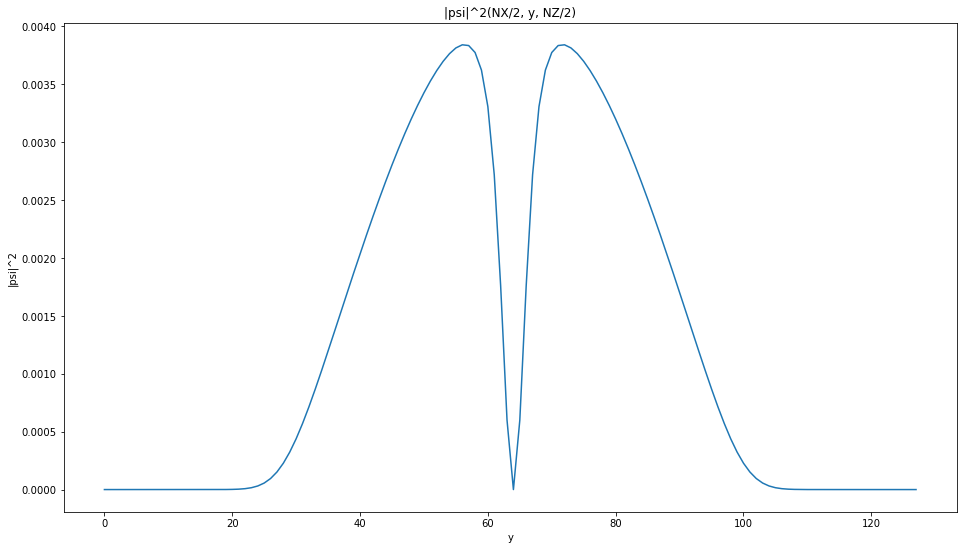

In [8]:
plot(Psi_pow_y, "|psi|^2(NX/2, y, NZ/2)", "y", "|psi|^2", "psi2_y")

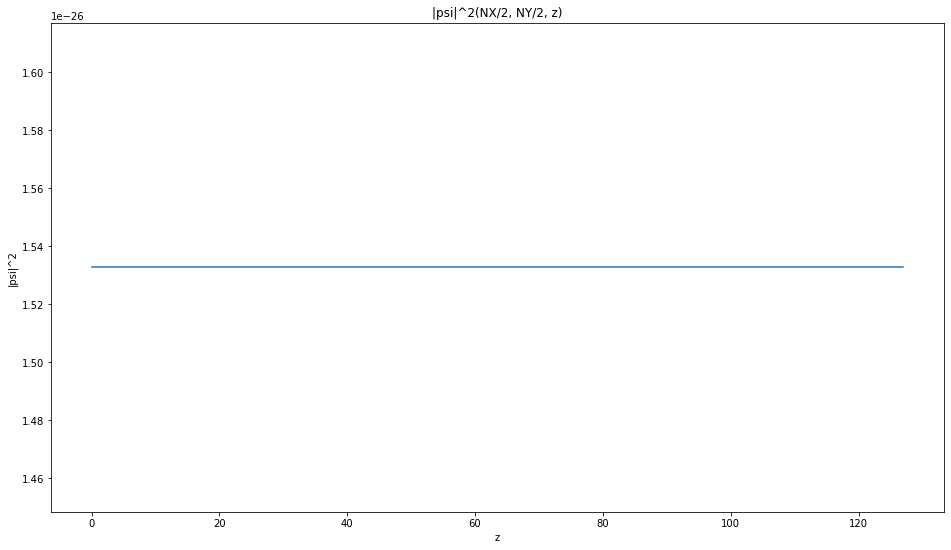

In [9]:
plot(Psi_pow_z, "|psi|^2(NX/2, NY/2, z)", "z", "|psi|^2", "psi2_z")

In [10]:
#const declaration
h_bar = 1 #(6.62607004*10**-34)/(np.pi*2)
m = 2  #6.6464731e-27 #9.10938356*10**-31

In [11]:
Psi = [[x,y,z] for x,y,z in zip(Psi_x,Psi_y,Psi_z)]

C:\Users\kacsk\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


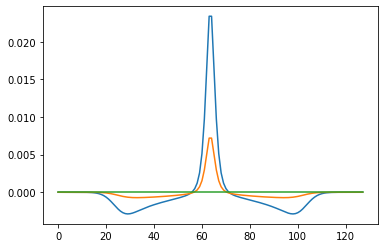

In [29]:
def divergence(F) -> np.array:   
    div = []
    F = np.array(F)
    for i,_ in enumerate(F):
        if i < len(F)-1:
            div.append((F[i+1]-F[i])/dx)
        if i == len(F)-1:
            div.append([0,0,0])
    
    return np.array(div)#[:,np.newaxis]

div = divergence(Psi)
plt.plot(div)

In [30]:
np.shape(div)

(128, 3)

In [31]:
def calculate_J2(Psi):
    J = ((h_bar/(2*m))*(np.multiply(np.conj(Psi),divergence(Psi))-np.multiply(Psi,divergence(np.conj(Psi)))))
         
    return J

In [32]:
j_2 = calculate_J2(Psi)

In [33]:
j_x = [j_tmp[0] for j_tmp in j_2]
j_y = [j_tmp[1] for j_tmp in j_2]
j_z = [j_tmp[2] for j_tmp in j_2]

In [34]:
j_xnorm = [np.sqrt(np.power(np.real(x), 2) + np.power(np.imag(x), 2)) for x in j_x]
j_ynorm = [np.sqrt(np.power(np.real(y), 2) + np.power(np.imag(y), 2)) for y in j_y]
j_znorm = [np.sqrt(np.power(np.real(z), 2) + np.power(np.imag(z), 2)) for z in j_z]

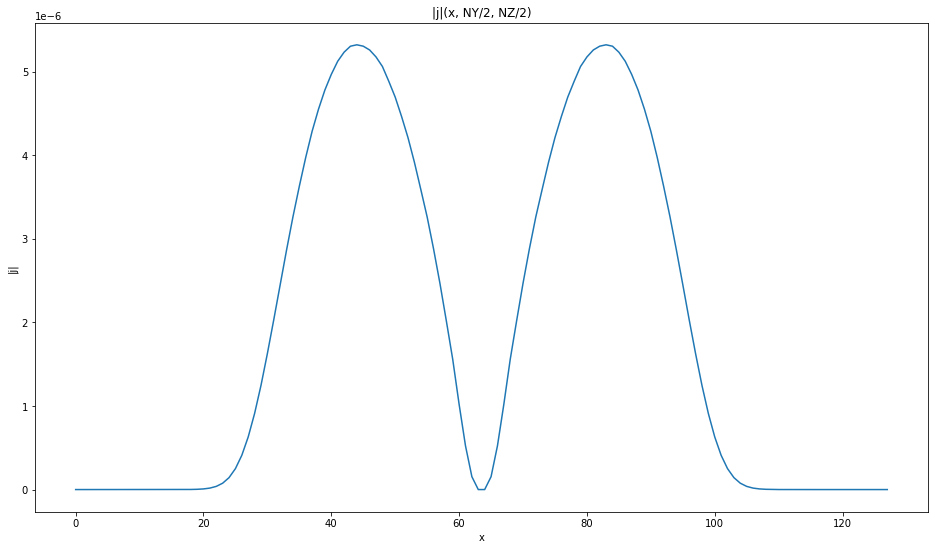

In [35]:
plot(j_xnorm, "|j|(x, NY/2, NZ/2)", "x", "|j|", "j_x")

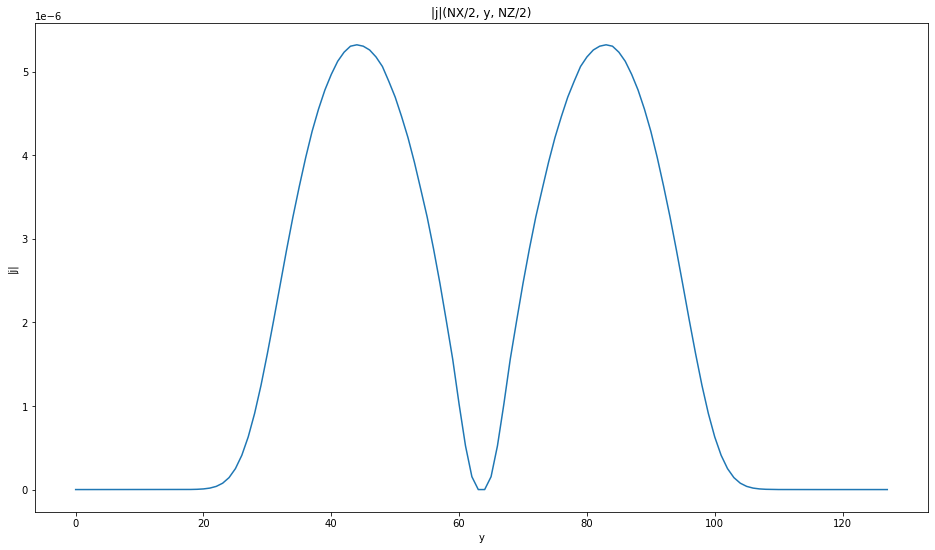

In [36]:
plot(j_ynorm, "|j|(NX/2, y, NZ/2)", "y", "|j|", "j_y")

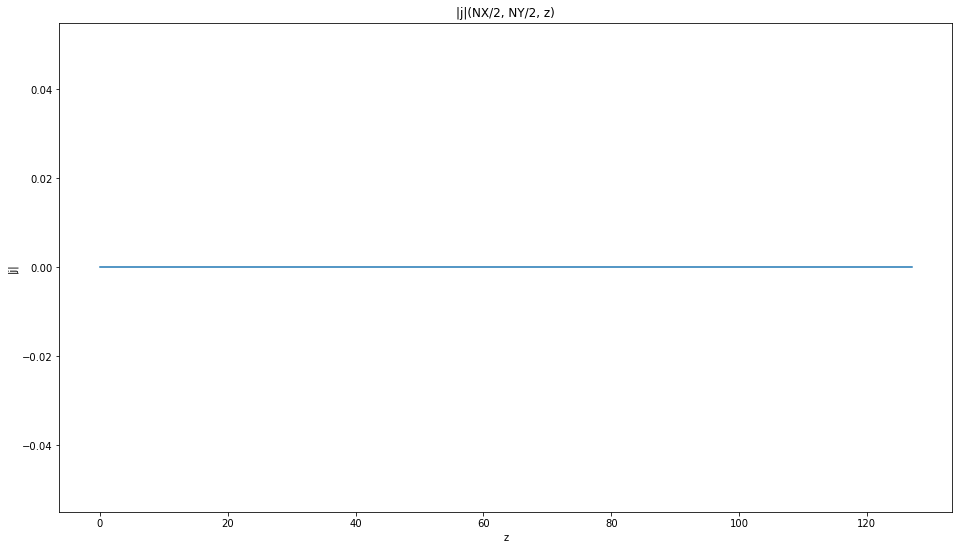

In [37]:
plot(j_znorm, "|j|(NX/2, NY/2, z)", "z", "|j|", "j_z")

In [38]:
Psi_norm_2 = [[x,y,z] for x,y,z in zip(Psi_pow_x,Psi_pow_y,Psi_pow_z)]

In [39]:
def Rho_calc(Psi_norm):
    Psi_norm = np.array(Psi_norm)
    
    X, Y, Z = 0, 0, 0
    for x, y, z in zip(Psi_norm[:,0],Psi_norm[:,1],Psi_norm[:,2]):
        X += x
        Y += y
        Z += z
        
    return X*Y*Z
    
Rho = Rho_calc(Psi_norm_2)
Rho

5.617657281968631e-26

In [40]:
j_norm = [[x,y,z] for x,y,z in zip(j_xnorm, j_ynorm, j_znorm)]

v = j_norm/Rho

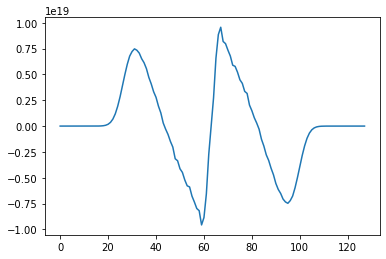

In [42]:
def derivative(F,dx):
    der = []
    F = np.array(F)
    for i,_ in enumerate(F):
        if i < len(F)-1:
            der.append((F[i+1]-F[i])/dx)
        if i == len(F)-1:
            der.append(0)
    
    return np.array(der)#[:,np.newaxis]
        

def Curl(v):
    x = derivative(v[:,2],dy) - derivative(v[:,1],dz)
    y = derivative(v[:,0],dz) - derivative(v[:,2],dx)
    z = derivative(v[:,1],dx) - derivative(v[:,0],dy)
    
    return [x,y,z]
    
Omega = np.array(Curl(v))
plt.plot(Omega[1])

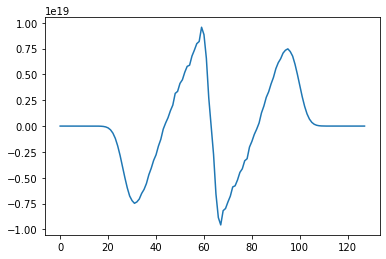

In [43]:
plt.plot(Omega[0])

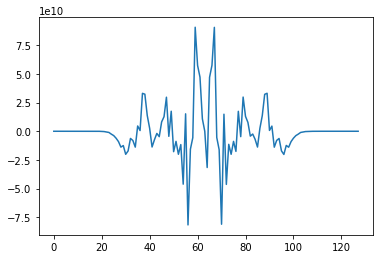

In [45]:
plt.plot(Omega[2])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

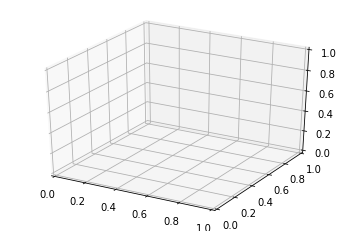

In [44]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(0, 129, 1), np.arange(0, 129, 1), np.arange(0, 129, 1))
ax.quiver(x, y, z, Omega[0], Omega[1], Omega[2], length=1)

plt.show()